In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\jacks\OneDrive\Documents\Elise\Instacart-Basket'

In [3]:
df_final= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

 ### Steps to follow:
 #### 1. Import libraries and data
 #### 2. Consider security implications
 #### 3. Create a regional segmentation of data
 #### 4. Create an exclusion flag for low activity customers
 #### 5. Create a profiling variabe based on age, income, certain goods in the 'department_id' column, and number of dependents
 #### 6. Create an appropriate visualizations to show the distribution of profiles.
 #### 7. Aggregate the max, mean, and min variables for usage frequency and expenditure.
 #### 8. Compare customer profile with regions and departments.
 #### 9. Produce suitable charts to illustrate results.

In [17]:
df_final.tail(100) 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First_name,last_name,Gender,State,Age,date_joined,No_of_Dependants,Marital_status,Income
32405941,396212,199758,4,3,17,30.0,21525.0,1.0,1.0,Organic Dried Blueberries,...,Non-frequent customer,Louise,Hernandez,Female,South Dakota,22,10/28/2018,2,married,44373
32405942,1075408,21688,2,6,14,4.0,8653.0,1.0,0.0,Daisy Cutter Pale Ale,...,Non-frequent customer,Frank,Callahan,Male,Idaho,33,1/14/2019,1,married,98838
32405943,2675209,21688,5,3,17,30.0,8653.0,1.0,1.0,Daisy Cutter Pale Ale,...,Non-frequent customer,Frank,Callahan,Male,Idaho,33,1/14/2019,1,married,98838
32405944,193552,21688,1,2,10,NaN,2633.0,1.0,0.0,Advance Powder Infant Formula,...,Non-frequent customer,Frank,Callahan,Male,Idaho,33,1/14/2019,1,married,98838
32405945,2083473,21688,3,6,21,21.0,2633.0,1.0,1.0,Advance Powder Infant Formula,...,Non-frequent customer,Frank,Callahan,Male,Idaho,33,1/14/2019,1,married,98838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32406036,156685,106143,26,4,23,5.0,19675.0,1.0,1.0,Organic Raspberry Black Tea,...,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
32406037,484769,66343,1,6,11,NaN,47210.0,1.0,0.0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32406038,1561557,66343,2,1,11,30.0,47210.0,1.0,1.0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32406039,276317,66343,3,6,15,19.0,47210.0,1.0,1.0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


In [10]:
df_final.shape

(32406041, 33)

In [12]:
# 2. Create a regional segmentation of data

#This is a PII present in the dataset, first and last names of customers. Although, I will not remove this information because it was not specified in the project brief.

In [13]:
# 03 Create a regional segmentation of the data. Determine whether there is a difference in spending habits between the different US regions.

In [27]:
#### Create a “Region” column based on the “State” column from your customers data set

# define regions


northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [30]:
# Creating regional flag column

df_final.loc[df_final['State'].isin(northeast), 'region']='Northeast'
df_final.loc[df_final['State'].isin(midwest), 'region']='Midwest'
df_final.loc[df_final['State'].isin(south), 'region']='South'
df_final.loc[df_final['State'].isin(west), 'region']='West'
   

In [31]:
# Checking length of new column

len(df_final['region'])

32406041

In [32]:
# Checking frequency

df_final['region'].value_counts(dropna=False)

South        10792300
West          8293217
Midwest       7597585
Northeast     5722939
Name: region, dtype: int64

In [37]:
#Create an exclusion flag for low-activity customers (customers with less than 5 orders)

# Creating exclusion flag column
df_final.loc[df_final['max_order']>=5, 'activity']='normal'
df_final.loc[df_final['max_order']<5, 'activity']='low'

In [38]:
# Checking new column frequency\n",

df_final['activity'].value_counts(dropna=False)

normal    30965686
low        1440355
Name: activity, dtype: int64

In [39]:
# Checking new column length

len(df_final['activity'])

32406041

In [40]:
# Creating a dataframe of customers with orders lower than 5

df_low = df_final[df_final['activity']=='low']

In [41]:
df_low.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,Gender,State,Age,date_joined,No_of_Dependants,Marital_status,Income,region,activity
1510,520620,120,1,3,11,NaN,196.0,2.0,0.0,Soda,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1511,3273029,120,3,2,8,19.0,196.0,2.0,1.0,Soda,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1512,520620,120,1,3,11,NaN,46149.0,1.0,0.0,Zero Calorie Cola,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1513,3273029,120,3,2,8,19.0,46149.0,1.0,1.0,Zero Calorie Cola,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1514,520620,120,1,3,11,NaN,26348.0,3.0,0.0,Mixed Fruit Fruit Snacks,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low


In [42]:
df_low['activity'].value_counts(dropna=False)

low    1440355
Name: activity, dtype: int64

In [43]:
# Exporting df_low

df_low.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))

In [44]:
# Creating a dataframe of customers with normal activity\n",

df_2 = df_final[df_final['activity']=='normal']

In [45]:
# Checking dataframe

df_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,Gender,State,Age,date_joined,No_of_Dependants,Marital_status,Income,region,activity
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal


In [46]:
df_2.shape

(30965686, 35)

In [47]:
df_2['activity'].value_counts(dropna=False)

normal    30965686
Name: activity, dtype: int64

In [48]:
# Confirming dataframes make length of original
len(df_low) + len(df_2)

32406041

In [49]:
# Deleting other dataframes to reduce memory usage

del df_final

In [50]:
#Q5-Q7.Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### Age Profile

In [63]:
# Creating age flag column

df_2.loc[df_2['Age']<=25, 'Age_group']='Young Adult'
df_2.loc[(df_2['Age']<65)&(df_2['Age']>25), 'Age_group']='Adult'
df_2.loc[df_2['Age']>=65, 'Age_group']='Senior'

In [59]:
df_2['Age_group'].value_counts()

Adult          18905215
Senior          8195806
Young Adult     3864665
Name: Age_group, dtype: int64

In [66]:
# creating column with aggregated data

df_2.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Adult        11.953134  1.0  99999.0
Senior       11.757620  1.0  99999.0
Young Adult  12.209154  1.0  99999.0

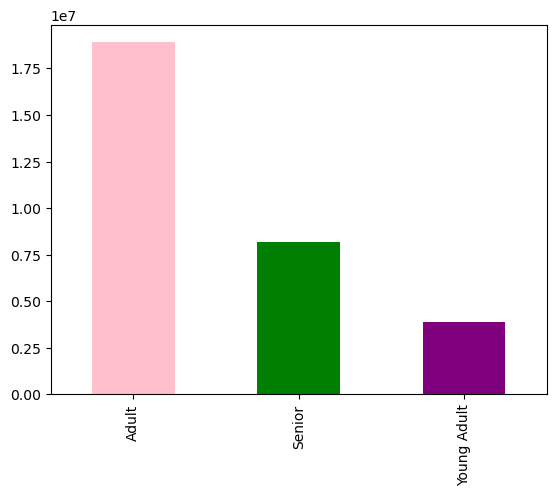

In [68]:
# Age profile visualization

bar2=df_2['age_group'].value_counts().plot.bar(color =['pink', 'green', 'purple'])

In [69]:
# Export Bar Chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_agegroup.png'))

## Income Profile

In [72]:
# Create income flag profile
df_2.loc[df_2['Income']<40000, 'income_group']='low income'
df_2.loc[(df_2['Income']>=40000)&(df_2['Income']<150000), 'income_group']='middle income'
df_2.loc[df_2['Income']>150000, 'income_group']='high income'

In [73]:
df_2['income_group'].value_counts()

middle income    25458200
high income       3894658
low income        1612087
Name: income_group, dtype: int64

In [76]:
# Aggregate for income group expenditure

df_2.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_group                          
high income    32.619273  1.0  99999.0
low income      6.502901  1.0     25.0
middle income   9.112756  1.0  99999.0

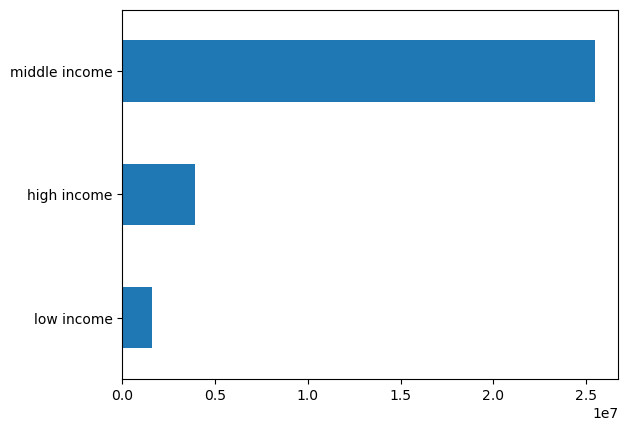

In [77]:
# Income profile visualization\
bar3 = df_2['income_group'].value_counts().sort_values().plot.barh()

In [78]:
# Export Bar Chart

bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_incomegroup.png'))

In [79]:
## Department ID profile

# Importing departments dataframe

df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [80]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [81]:
# Renaming unnamed column to department_id

df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [82]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [84]:
# Turning department dataframe into data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [85]:
# Connect department names to department_id in dataframe

df_2['department'] = df_2['department_id'].map(data_dict)

In [86]:
df_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,No_of_Dependants,Marital_status,Income,region,activity,age_group,Age_group,income_group,department
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,2/17/2019,3,married,40423,South,normal,Adult,Adult,middle income,beverages
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,South,normal,Adult,Adult,middle income,beverages
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,South,normal,Adult,Adult,middle income,beverages
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,South,normal,Adult,Adult,middle income,beverages
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,South,normal,Adult,Adult,middle income,beverages


In [87]:
## - Baby Profile

In [90]:
# Creating baby department flag column

df_2['baby_status'] = [1 if x == 'babies' else 0 for x in df_2['department']]
df_2['baby_status'] = df_2.groupby(['user_id'])['baby_status'].transform(np.max)

In [91]:
# Checking column

df_2['baby_status'].value_counts(dropna=False)

0    21155035
1     9810651
Name: baby_status, dtype: int64

In [93]:
# Aggregate for baby status bracket expenditure

df_2.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
baby_status                         
0            12.480415  1.0  99999.0
1            10.753661  1.0  99999.0

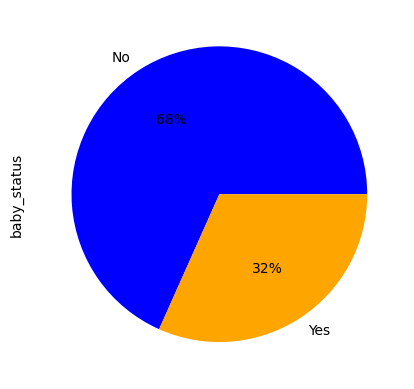

In [95]:
# Baby Status Visualization

pie = df_2['baby_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['blue','orange'])

In [96]:
# Export pie chart

pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pei_babystatus.png'))

In [97]:
## Department - Alcohol Profile



In [99]:
# Creating alcohol flag column 
df_2['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df_2['department']]
df_2['alcohol_status'] = df_2.groupby(['user_id'])['alcohol_status'].transform(np.max)

In [100]:
df_2['alcohol_status'].value_counts(dropna=False)

0    28635134
1     2330552
Name: alcohol_status, dtype: int64

In [101]:
# Aggregate for alcohol_ tatus bracket expenditure

df_2.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
alcohol_status                         
0               10.979405  1.0  99999.0
1               23.654187  1.0  99999.0

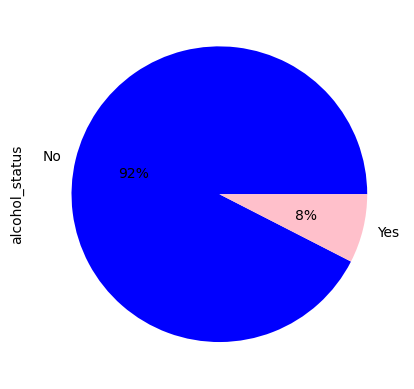

In [106]:
# Alcohol status visualization

pie2 = df_2['alcohol_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['blue','pink'])

In [107]:
# Export alcohol status pie chart

pie2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_alcoholstatus.png'))

#### Q8. Compare your customer profiles with regions and departments.

In [110]:
# Creating crosstab for region and age group

age_region = pd.crosstab(df_2['region'], df_2['Age_group'], dropna = False)

In [111]:
# Checking crosstab

age_region

Age_group,Adult,Senior,Young Adult
region,,,
Midwest,4459452,1904119,898192
Northeast,3300093,1484857,679929
South,6287950,2708539,1315042
West,4857720,2098291,971502


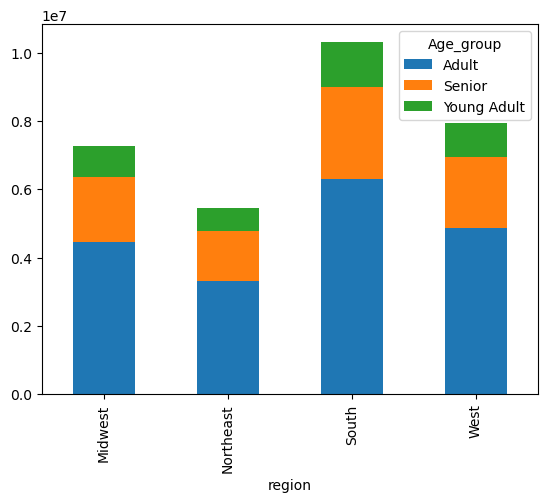

In [112]:
# Age Region Bar Chart

Bar3 = age_region.plot(kind='bar', stacked =True)

In [114]:
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))

In [115]:
# Creating crosstab for region and income

region_income = pd.crosstab(df_2['region'], df_2['income_group'], dropna = False)

In [116]:
# Checking crosstab

region_income

income_group,high income,low income,middle income
region,,,
Midwest,916998,373597,5970634
Northeast,677704,283130,4503995
South,1290335,552126,8468913
West,1009621,403234,6514658


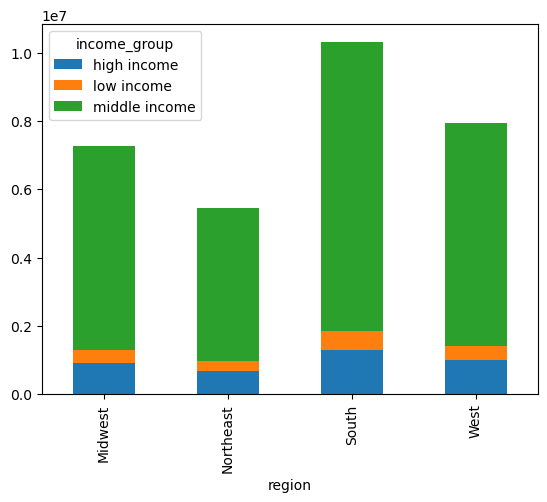

In [117]:
# Income region bar chart

bar5 = region_income.plot(kind='bar', stacked =True)

In [118]:
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income.png'))

In [119]:
# Creating crosstab for region and department

region_dep = pd.crosstab(df_2['department'], df_2['region'], dropna = False)

In [120]:
# Checking Crosstab
region_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,34052,25034,48822,36766
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156383,118074,223534,173881
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


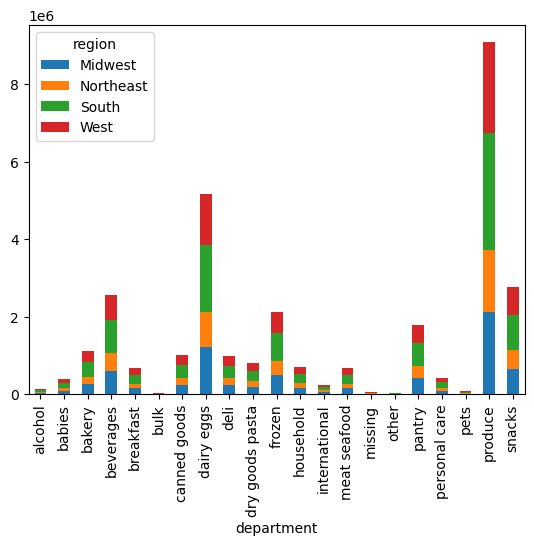

In [121]:
# Region Department Bar Chart

barr = region_dep.plot(kind='bar', stacked =True)

In [122]:
barr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'))

In [123]:
# Creating crosstab for region and department

region_pricerange = pd.crosstab(df_2['region'], df_2['price_range_loc'], dropna = False)

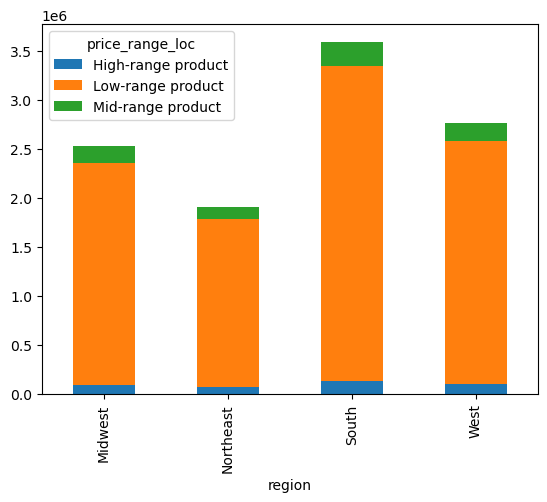

In [124]:
# Region Price Range Bar Chart

bar7 = region_pricerange.plot(kind='bar', stacked =True)

In [125]:
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_pricerange.png'))

In [129]:
# Export dataframe 


df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final.pkl'))